In [ ]:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [1]:
#using sql Magic
%load_ext sql

In [2]:
#connecting to my IBMDB2 cloud instance
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
#%sql ibm_db_sa://*****:*******@******:******/BLUDB?security=SSL

%sql ibm_db_sa://

'Connected: bls44444@BLUDB'

---------------------------------------------------------------------------------------
##### First Copying the Dataset from webpage to Pandas dataframe
##### Then using PERSIST keyword to create DB Table and Populate it with this data

In [4]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql drop table chicago_socioeconomic_data
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.
 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB


'Persisted chicago_socioeconomic_data'

In [5]:
%sql select  * from chicago_socioeconomic_data limit 10

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


---
## Exploratory Analysis

### Observation 1

##### Total rows are in the dataset?


In [6]:
%sql select count(*) from chicago_socioeconomic_data ;

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


1
78


### Observation 2

##### Areas in Chicago having a hardship index greater than 50.0?


In [7]:
%%sql
select count(ca) from chicago_socioeconomic_data where hardship_index > 50.0


 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


1
38


### Observation 3

##### Maximum value of hardship index in this dataset


In [12]:
%%sql
select max(hardship_index) as max_hardship_value from chicago_socioeconomic_data

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


max_hardship_value
98.0


### Observation 4

##### Community area having the highest hardship index


In [14]:
%%sql 

select community_area_name from chicago_socioeconomic_data 
where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data )

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


community_area_name
Riverdale


### Observation 5

##### Chicago community areas having per-capita incomes greater than $60,000


In [8]:
%%sql 

select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Observation 6

Correlation between the two variables `per_capita_income_` and `hardship_index`.


<AxesSubplot:xlabel='hardship_index', ylabel='per_capita_income_'>

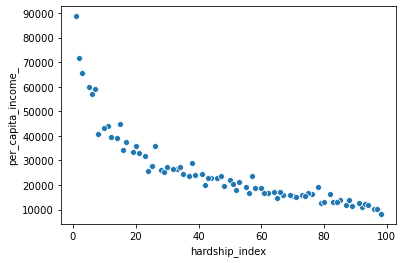

In [31]:
import seaborn as sns

sns.scatterplot(data=chicago_socioeconomic_data, x="hardship_index", y="per_capita_income_")


POSITIVE CORRELATION

### Observation 7

##### Correlation Between `per_capita_income_` and `percent_households_below_poverty` 

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


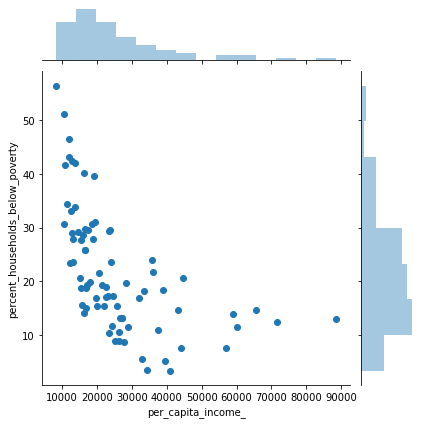

In [9]:
%matplotlib inline
import seaborn as sns

income_vs_percent_households_below_poverty = %sql SELECT per_capita_income_,percent_households_below_poverty  FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_percent_households_below_poverty.DataFrame())


### Observation 8

##### Correlation Between `per_capita_income_` and `percent_aged_16_unemployed`

 * ibm_db_sa://bls44444:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


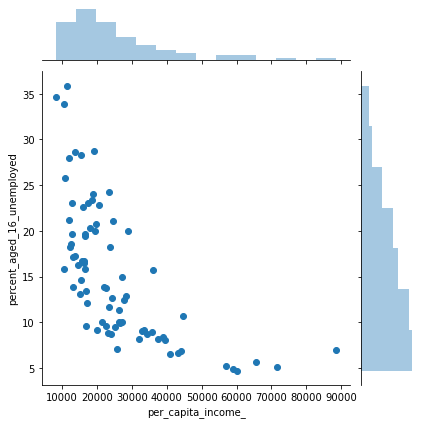

In [33]:
%matplotlib inline
import seaborn as sns

income_vs_percent_aged_16_unemployed = %sql SELECT per_capita_income_,percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_percent_aged_16_unemployed.DataFrame())
